### Necessary Libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import warnings
warnings.filterwarnings("ignore")


### Exploring The Dataset

In [4]:
df = pd.read_csv("ecommerce_customer_behavior_dataset.csv")

In [8]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

In [10]:
num_duplicates = df.duplicated().sum()
print(f"Total number of duplicate rows in the dataset: {num_duplicates}")

Total number of duplicate rows in the dataset: 0


In [11]:
df.describe()

,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


##### Since the dataset clean let's deep dive into the analysis

### Level 1: Basic Insights

##### Q1: Find Mean, Median, and Mode (Age)

Mean Age: 43.7899, Median: 44.0, Mode: 51


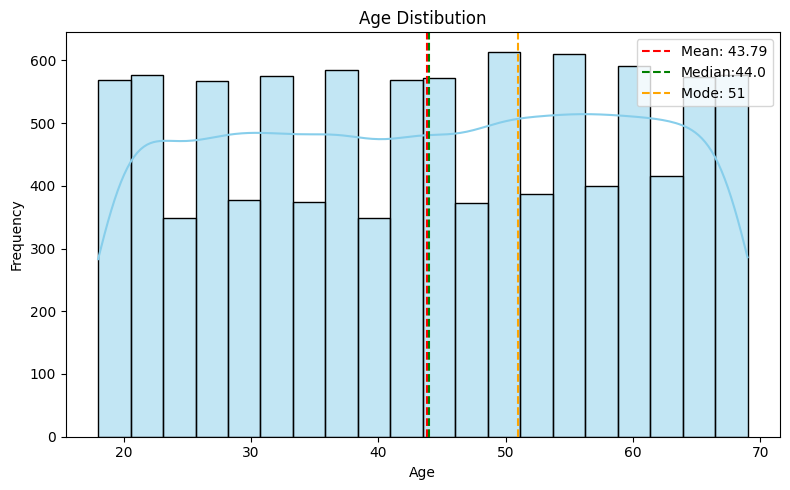

In [100]:
mean_age = df['Age'].mean()
median_age =df['Age'].median()
mode_age = df['Age'].mode()[0]
print(f"Mean Age: {mean_age}, Median: {median_age}, Mode: {mode_age}")

plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=20,kde=True,color='skyblue')
plt.axvline(mean_age,color='red',linestyle='--',label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age,color='green',linestyle='--',label=f'Median:{median_age}')
plt.axvline(mode_age, color='orange', linestyle='--',label=f'Mode: {mode_age}')
plt.title("Age Distibution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

##### Q2: Find variance, standard deviation, and z-score (Purchase Amount)

##### Boxplot

In [98]:
import plotly.express as px

fig = px.box(
    df,
    y='Purchase Amount ($)',
    color_discrete_sequence=['lightcoral'],
    title='<b>Purchase Amount Distribution (Boxplot)</b>',
    labels={'Purchase Amount ($)': 'Purchase Amount ($)'}
)

fig.update_layout(
    yaxis_title='Purchase Amount ($)',
    width=600,
    height=500,
)

fig.show()


#### Z-Score Visual

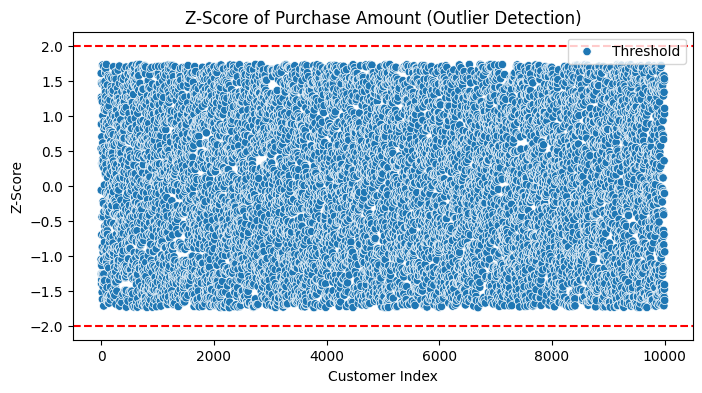

In [12]:
from scipy.stats import zscore

df['Z-Score'] = zscore(df['Purchase Amount ($)'])
plt.figure(figsize=(8,4))
sns.scatterplot(x=range(len(df)),y =df['Z-Score'],hue=(abs(df['Z-Score'])>2))
plt.axhline(2,color='red',linestyle='--')
plt.axhline(-2,color='red',linestyle='--')
plt.title('Z-Score of Purchase Amount (Outlier Detection)')
plt.xlabel("Customer Index")
plt.ylabel("Z-Score")
plt.legend(["Threshold"])
plt.show()

#### Q3: What are the top three product categories based on the number of purchases?

In [97]:
top_products = df['Product Category'].value_counts().head(3)

fig = px.bar(
    x=top_products.index,
    y=top_products.values,
    color=top_products.index, 
    text=top_products.values,
    color_discrete_sequence=px.colors.qualitative.Pastel,
    labels={'x': 'Product Category', 'y': 'Number of Purchases'},
    title='<b>Top 3 Product Categories</b>'
)
fig.update_traces(textposition='outside')
fig.update_layout(
    height=500,
    width=600
)
fig.show()


#### Q4: How many customers are classified as return customers?

In [62]:

return_counts = df['Return Customer'].value_counts()
return_df=return_counts.reset_index()
return_df.columns=['Return Status','Count']
return_df['Return Status']= return_df['Return Status'].map({True:'Return',False:'Not Return'})
colors=['orange','lightgreen']
fig =px.pie(
    return_df,
    names="Return Status",
    values='Count',
    title='<b>Return Customer Distribution</b>',
   color_discrete_sequence=colors,
   hole=0.3
)
fig.update_layout(
    height=500,
    width=600
)
fig.update_traces(textinfo='percent+label')
fig.show()


#### Q5: What is the average review score given by customers?

In [104]:
import plotly.express as px
import pandas as pd

average_rating = df['Review Score (1-5)'].mean()
score_counts = df['Review Score (1-5)'].value_counts().sort_index()
score_df = pd.DataFrame({
    'Review Score': score_counts.index,
    'Count': score_counts.values
})


fig = px.bar(
    score_df,
    x='Review Score',
    y='Count',
    text='Count',              
    color='Review Score',     
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textposition='outside')  
fig.update_layout(
    height=500,
    width=600,
    title=f'<b>Review Score Distribution (Average Rating: {average_rating:.2f})</b>',
    xaxis_title='Review Score',
    yaxis_title='Count',
    template='plotly_white',
    xaxis=dict(tickmode='linear')
)

fig.show()


#### Q6: How does the average delivery time vary between subscription statuses (Free, Premium)?

In [130]:
fig = px.bar(
    df.groupby('Subscription Status', as_index=False)['Delivery Time (days)'].mean(),
    x='Subscription Status',
    y='Delivery Time (days)',
    color='Subscription Status',
    color_discrete_sequence=px.colors.qualitative.Set1,
    text='Delivery Time (days)' 
)


fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')


fig.update_layout(
    height = 500,
    width = 600,
    title='<b>Average Delivery Time by Subscription Type</b>',
    xaxis_title='Subscription Status',
    yaxis_title='Average Delivery Time (days)',
    template='plotly_white'
)

fig.show()


#### Q7: How many customers are subscribed to the service?

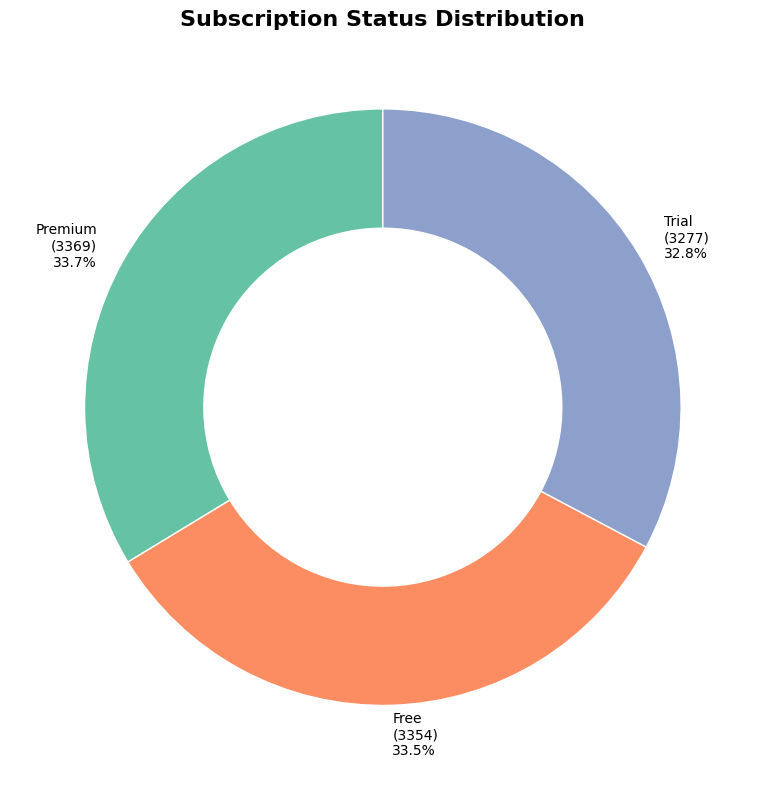

In [127]:
sub_counts = df['Subscription Status'].value_counts()
labels = [f"{label}\n({count})\n{percent:.1f}%" 
          for label, count, percent in zip(
              sub_counts.index, 
              sub_counts.values, 
              100 * sub_counts.values / sub_counts.values.sum()
          )]


plt.figure(figsize=(8, 8))

wedges, texts = plt.pie(
    sub_counts,
    labels=labels,
    colors=sns.color_palette('Set2'),
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='white')
)

plt.title('Subscription Status Distribution', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop, Tablet)

In [139]:

device_usage = df['Device Type'].value_counts().reset_index()
device_usage.columns = ['Device Type', 'Count']


device_usage['Percentage'] = 100 * device_usage['Count'] / device_usage['Count'].sum()


device_usage['label_text'] = device_usage.apply(
    lambda row: f"{row['Device Type']}<br>{row['Count']} ({row['Percentage']:.1f}%)", axis=1
)


pulls = [0.1 if i == 0 else 0 for i in range(len(device_usage))]  # largest slice first row

fig = px.pie(
    device_usage,
    values='Count',
    names='Device Type',
    hole=0,  # 0 for pie, >0 for donut
    color='Device Type',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hover_data=['Percentage'],
)

fig.update_traces(
    text=device_usage['label_text'],
    textinfo='text',
    pull=pulls,
    textposition='inside',
    insidetextorientation='radial',
    marker=dict(line=dict(color='white', width=2))
)

fig.update_layout(
    height = 500,
    width = 600,
    title_text='📱 Device Usage Distribution',
    title_x=0.5,
    legend_title_text='Device Type',
    template='plotly_white',
)

fig.show()


#### Q9: What is the average purchase amount for customers who availed discounts compared to those who didnʼt?

In [144]:
discount_avg = df.groupby('Discount Availed')['Purchase Amount ($)'].mean().reset_index()

fig = px.bar(discount_avg, x='Discount Availed', y='Purchase Amount ($)',
             title='Avg Purchase Amount: Discount vs No Discount',
             text='Purchase Amount ($)',
             color='Purchase Amount ($)',
             color_continuous_scale='Tealgrn')

fig.update_layout(template='plotly_white')
fig.show()
